In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_x = pd.read_csv('Logistic_X_Train.csv')
df_y = pd.read_csv('Logistic_Y_Train.csv')

X = df_x.values
Y = df_y.values

In [3]:
X.shape

(2250, 2)

In [4]:
Y.shape

(2250, 1)

In [5]:
X_train = X[:1800,:]
Y_train = Y[:1800,:]
print(X_train.shape)
print(Y_train.shape)

X_val = X[1800:,:]
Y_val = Y[1800:,:]

(1800, 2)
(1800, 1)


In [6]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [7]:
input_size = X.shape[1]
layers = [4,3]
output_size = 2

In [53]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {}
        
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
        
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2) 
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_ = self.activation_outputs
        delta3 = y_ - y
        
        m = x.shape[0]
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1 - np.square(a2))*(np.dot(delta3,W3.T))
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1 - np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    

In [54]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

In [55]:
def one_hot(y,depth):
    m = y.shape[0]
    
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [116]:
model = NeuralNetwork(input_size,layers,output_size)

In [117]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    
    training_acc = []
    validation_acc = []
    classes = 2
    Y_oht = one_hot(Y,classes)
    y_val_oht = one_hot(Y_val,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        model.backward(X,Y_oht,learning_rate)
        acc = np.sum(model.predict(X)==Y)/X.shape[0]
        acc_val = np.sum(model.predict(X_val)==Y_val.reshape(-1,))/X_val.shape[0]
        training_acc.append(acc)
        validation_acc.append(acc_val)
        
        if(logs):
            print("Epoch %d Loss %.4f %.4f"%(ix,acc,acc_val))
            
    return training_acc,validation_acc

In [118]:
train_acc,val_Acc= train(X_train,Y_train,model,650,0.0001)

Epoch 0 Loss 0.8533 0.8667
Epoch 1 Loss 0.8578 0.8778
Epoch 2 Loss 0.8611 0.8800
Epoch 3 Loss 0.8628 0.8800
Epoch 4 Loss 0.8650 0.8822
Epoch 5 Loss 0.8661 0.8800
Epoch 6 Loss 0.8672 0.8778
Epoch 7 Loss 0.8689 0.8844
Epoch 8 Loss 0.8689 0.8889
Epoch 9 Loss 0.8689 0.8911
Epoch 10 Loss 0.8689 0.8933
Epoch 11 Loss 0.8711 0.8933
Epoch 12 Loss 0.8744 0.8933
Epoch 13 Loss 0.8767 0.8956
Epoch 14 Loss 0.8778 0.8978
Epoch 15 Loss 0.8800 0.9022
Epoch 16 Loss 0.8817 0.9022
Epoch 17 Loss 0.8833 0.9022
Epoch 18 Loss 0.8839 0.9022
Epoch 19 Loss 0.8839 0.9022
Epoch 20 Loss 0.8850 0.9044
Epoch 21 Loss 0.8861 0.9044
Epoch 22 Loss 0.8867 0.9044
Epoch 23 Loss 0.8878 0.9044
Epoch 24 Loss 0.8889 0.9044
Epoch 25 Loss 0.8900 0.9044
Epoch 26 Loss 0.8906 0.9044
Epoch 27 Loss 0.8917 0.9044
Epoch 28 Loss 0.8928 0.9089
Epoch 29 Loss 0.8944 0.9089
Epoch 30 Loss 0.8956 0.9089
Epoch 31 Loss 0.8972 0.9111
Epoch 32 Loss 0.8972 0.9111
Epoch 33 Loss 0.8983 0.9133
Epoch 34 Loss 0.8994 0.9156
Epoch 35 Loss 0.8994 0.9133
Ep

Epoch 300 Loss 0.9628 0.9689
Epoch 301 Loss 0.9628 0.9689
Epoch 302 Loss 0.9633 0.9689
Epoch 303 Loss 0.9633 0.9689
Epoch 304 Loss 0.9639 0.9689
Epoch 305 Loss 0.9633 0.9689
Epoch 306 Loss 0.9633 0.9689
Epoch 307 Loss 0.9633 0.9689
Epoch 308 Loss 0.9633 0.9689
Epoch 309 Loss 0.9633 0.9689
Epoch 310 Loss 0.9633 0.9689
Epoch 311 Loss 0.9633 0.9689
Epoch 312 Loss 0.9628 0.9689
Epoch 313 Loss 0.9622 0.9689
Epoch 314 Loss 0.9622 0.9689
Epoch 315 Loss 0.9622 0.9689
Epoch 316 Loss 0.9622 0.9689
Epoch 317 Loss 0.9622 0.9689
Epoch 318 Loss 0.9622 0.9689
Epoch 319 Loss 0.9622 0.9689
Epoch 320 Loss 0.9622 0.9689
Epoch 321 Loss 0.9622 0.9689
Epoch 322 Loss 0.9622 0.9689
Epoch 323 Loss 0.9622 0.9689
Epoch 324 Loss 0.9628 0.9689
Epoch 325 Loss 0.9633 0.9689
Epoch 326 Loss 0.9633 0.9689
Epoch 327 Loss 0.9633 0.9689
Epoch 328 Loss 0.9633 0.9689
Epoch 329 Loss 0.9633 0.9689
Epoch 330 Loss 0.9633 0.9689
Epoch 331 Loss 0.9633 0.9689
Epoch 332 Loss 0.9633 0.9689
Epoch 333 Loss 0.9633 0.9689
Epoch 334 Loss

Epoch 589 Loss 0.9656 0.9711
Epoch 590 Loss 0.9656 0.9711
Epoch 591 Loss 0.9656 0.9711
Epoch 592 Loss 0.9656 0.9711
Epoch 593 Loss 0.9656 0.9711
Epoch 594 Loss 0.9656 0.9711
Epoch 595 Loss 0.9656 0.9711
Epoch 596 Loss 0.9656 0.9711
Epoch 597 Loss 0.9656 0.9711
Epoch 598 Loss 0.9656 0.9711
Epoch 599 Loss 0.9656 0.9711
Epoch 600 Loss 0.9656 0.9711
Epoch 601 Loss 0.9656 0.9711
Epoch 602 Loss 0.9656 0.9711
Epoch 603 Loss 0.9656 0.9711
Epoch 604 Loss 0.9656 0.9711
Epoch 605 Loss 0.9656 0.9711
Epoch 606 Loss 0.9656 0.9711
Epoch 607 Loss 0.9656 0.9711
Epoch 608 Loss 0.9656 0.9711
Epoch 609 Loss 0.9656 0.9711
Epoch 610 Loss 0.9656 0.9711
Epoch 611 Loss 0.9656 0.9711
Epoch 612 Loss 0.9656 0.9711
Epoch 613 Loss 0.9656 0.9711
Epoch 614 Loss 0.9656 0.9711
Epoch 615 Loss 0.9656 0.9711
Epoch 616 Loss 0.9656 0.9711
Epoch 617 Loss 0.9656 0.9711
Epoch 618 Loss 0.9656 0.9711
Epoch 619 Loss 0.9656 0.9711
Epoch 620 Loss 0.9656 0.9711
Epoch 621 Loss 0.9656 0.9711
Epoch 622 Loss 0.9656 0.9711
Epoch 623 Loss

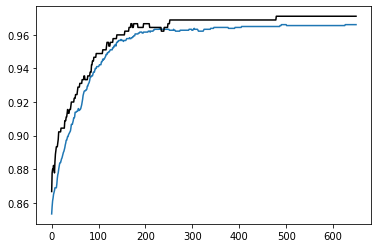

In [119]:
plt.plot(train_acc)
plt.plot(val_Acc,color="black")
plt.show()

Epoch 0 Loss 0.3494 0.3622
Epoch 1 Loss 0.6667 0.6867
Epoch 2 Loss 0.8083 0.8378
Epoch 3 Loss 0.8206 0.8467
Epoch 4 Loss 0.8283 0.8533
Epoch 5 Loss 0.8378 0.8578
Epoch 6 Loss 0.8433 0.8600
Epoch 7 Loss 0.8472 0.8622
Epoch 8 Loss 0.8506 0.8644
Epoch 9 Loss 0.8556 0.8667
Epoch 10 Loss 0.8594 0.8667
Epoch 11 Loss 0.8611 0.8689
Epoch 12 Loss 0.8628 0.8689
Epoch 13 Loss 0.8667 0.8711
Epoch 14 Loss 0.8683 0.8756
Epoch 15 Loss 0.8700 0.8800
Epoch 16 Loss 0.8722 0.8800
Epoch 17 Loss 0.8733 0.8800
Epoch 18 Loss 0.8733 0.8822
Epoch 19 Loss 0.8733 0.8800
Epoch 20 Loss 0.8739 0.8800
Epoch 21 Loss 0.8750 0.8822
Epoch 22 Loss 0.8756 0.8822
Epoch 23 Loss 0.8750 0.8822
Epoch 24 Loss 0.8756 0.8889
Epoch 25 Loss 0.8761 0.8889
Epoch 26 Loss 0.8761 0.8889
Epoch 27 Loss 0.8756 0.8889
Epoch 28 Loss 0.8761 0.8889
Epoch 29 Loss 0.8756 0.8889
Epoch 30 Loss 0.8761 0.8889
Epoch 31 Loss 0.8761 0.8889
Epoch 32 Loss 0.8756 0.8889
Epoch 33 Loss 0.8750 0.8889
Epoch 34 Loss 0.8756 0.8911
Epoch 35 Loss 0.8756 0.8911
Ep

Epoch 299 Loss 0.9539 0.9556
Epoch 300 Loss 0.9539 0.9556
Epoch 301 Loss 0.9539 0.9533
Epoch 302 Loss 0.9539 0.9533
Epoch 303 Loss 0.9539 0.9533
Epoch 304 Loss 0.9539 0.9533
Epoch 305 Loss 0.9544 0.9533
Epoch 306 Loss 0.9550 0.9533
Epoch 307 Loss 0.9550 0.9533
Epoch 308 Loss 0.9550 0.9533
Epoch 309 Loss 0.9550 0.9533
Epoch 310 Loss 0.9556 0.9533
Epoch 311 Loss 0.9556 0.9533
Epoch 312 Loss 0.9556 0.9533
Epoch 313 Loss 0.9556 0.9533
Epoch 314 Loss 0.9556 0.9533
Epoch 315 Loss 0.9556 0.9533
Epoch 316 Loss 0.9561 0.9556
Epoch 317 Loss 0.9561 0.9556
Epoch 318 Loss 0.9567 0.9556
Epoch 319 Loss 0.9578 0.9556
Epoch 320 Loss 0.9583 0.9578
Epoch 321 Loss 0.9589 0.9578
Epoch 322 Loss 0.9589 0.9578
Epoch 323 Loss 0.9589 0.9578
Epoch 324 Loss 0.9589 0.9578
Epoch 325 Loss 0.9589 0.9578
Epoch 326 Loss 0.9589 0.9578
Epoch 327 Loss 0.9589 0.9578
Epoch 328 Loss 0.9583 0.9578
Epoch 329 Loss 0.9583 0.9578
Epoch 330 Loss 0.9583 0.9578
Epoch 331 Loss 0.9589 0.9578
Epoch 332 Loss 0.9589 0.9578
Epoch 333 Loss

Epoch 586 Loss 0.9617 0.9578
Epoch 587 Loss 0.9572 0.9667
Epoch 588 Loss 0.9617 0.9578
Epoch 589 Loss 0.9561 0.9689
Epoch 590 Loss 0.9611 0.9600
Epoch 591 Loss 0.9561 0.9711
Epoch 592 Loss 0.9622 0.9600
Epoch 593 Loss 0.9561 0.9711
Epoch 594 Loss 0.9622 0.9622
Epoch 595 Loss 0.9572 0.9689
Epoch 596 Loss 0.9622 0.9622
Epoch 597 Loss 0.9572 0.9689
Epoch 598 Loss 0.9628 0.9622
Epoch 599 Loss 0.9578 0.9689
Epoch 600 Loss 0.9633 0.9622
Epoch 601 Loss 0.9578 0.9689
Epoch 602 Loss 0.9633 0.9622
Epoch 603 Loss 0.9578 0.9689
Epoch 604 Loss 0.9628 0.9600
Epoch 605 Loss 0.9578 0.9689
Epoch 606 Loss 0.9628 0.9600
Epoch 607 Loss 0.9578 0.9689
Epoch 608 Loss 0.9628 0.9600
Epoch 609 Loss 0.9572 0.9689
Epoch 610 Loss 0.9628 0.9600
Epoch 611 Loss 0.9567 0.9689
Epoch 612 Loss 0.9617 0.9600
Epoch 613 Loss 0.9561 0.9689
Epoch 614 Loss 0.9617 0.9600
Epoch 615 Loss 0.9561 0.9711
Epoch 616 Loss 0.9611 0.9622
Epoch 617 Loss 0.9561 0.9689
Epoch 618 Loss 0.9606 0.9622
Epoch 619 Loss 0.9556 0.9667
Epoch 620 Loss

Epoch 874 Loss 0.9617 0.9644
Epoch 875 Loss 0.9583 0.9711
Epoch 876 Loss 0.9617 0.9644
Epoch 877 Loss 0.9583 0.9711
Epoch 878 Loss 0.9617 0.9644
Epoch 879 Loss 0.9583 0.9711
Epoch 880 Loss 0.9617 0.9644
Epoch 881 Loss 0.9583 0.9711
Epoch 882 Loss 0.9617 0.9644
Epoch 883 Loss 0.9583 0.9711
Epoch 884 Loss 0.9617 0.9644
Epoch 885 Loss 0.9583 0.9711
Epoch 886 Loss 0.9617 0.9644
Epoch 887 Loss 0.9583 0.9711
Epoch 888 Loss 0.9617 0.9644
Epoch 889 Loss 0.9583 0.9711
Epoch 890 Loss 0.9617 0.9644
Epoch 891 Loss 0.9583 0.9711
Epoch 892 Loss 0.9617 0.9644
Epoch 893 Loss 0.9583 0.9711
Epoch 894 Loss 0.9617 0.9644
Epoch 895 Loss 0.9583 0.9711
Epoch 896 Loss 0.9617 0.9644
Epoch 897 Loss 0.9583 0.9711
Epoch 898 Loss 0.9617 0.9644
Epoch 899 Loss 0.9583 0.9711
Epoch 900 Loss 0.9617 0.9644
Epoch 901 Loss 0.9583 0.9711
Epoch 902 Loss 0.9617 0.9644
Epoch 903 Loss 0.9583 0.9711
Epoch 904 Loss 0.9617 0.9644
Epoch 905 Loss 0.9589 0.9711
Epoch 906 Loss 0.9617 0.9644
Epoch 907 Loss 0.9589 0.9711
Epoch 908 Loss

Epoch 1162 Loss 0.9622 0.9622
Epoch 1163 Loss 0.9611 0.9689
Epoch 1164 Loss 0.9622 0.9622
Epoch 1165 Loss 0.9611 0.9689
Epoch 1166 Loss 0.9622 0.9622
Epoch 1167 Loss 0.9611 0.9689
Epoch 1168 Loss 0.9622 0.9622
Epoch 1169 Loss 0.9611 0.9689
Epoch 1170 Loss 0.9622 0.9622
Epoch 1171 Loss 0.9611 0.9689
Epoch 1172 Loss 0.9622 0.9622
Epoch 1173 Loss 0.9611 0.9689
Epoch 1174 Loss 0.9622 0.9622
Epoch 1175 Loss 0.9611 0.9689
Epoch 1176 Loss 0.9622 0.9622
Epoch 1177 Loss 0.9611 0.9689
Epoch 1178 Loss 0.9622 0.9622
Epoch 1179 Loss 0.9611 0.9689
Epoch 1180 Loss 0.9622 0.9622
Epoch 1181 Loss 0.9611 0.9689
Epoch 1182 Loss 0.9622 0.9622
Epoch 1183 Loss 0.9611 0.9689
Epoch 1184 Loss 0.9622 0.9622
Epoch 1185 Loss 0.9611 0.9689
Epoch 1186 Loss 0.9622 0.9622
Epoch 1187 Loss 0.9611 0.9689
Epoch 1188 Loss 0.9622 0.9622
Epoch 1189 Loss 0.9611 0.9689
Epoch 1190 Loss 0.9622 0.9622
Epoch 1191 Loss 0.9611 0.9689
Epoch 1192 Loss 0.9622 0.9622
Epoch 1193 Loss 0.9611 0.9689
Epoch 1194 Loss 0.9622 0.9622
Epoch 1195

Epoch 1448 Loss 0.9628 0.9644
Epoch 1449 Loss 0.9611 0.9689
Epoch 1450 Loss 0.9628 0.9644
Epoch 1451 Loss 0.9611 0.9689
Epoch 1452 Loss 0.9628 0.9644
Epoch 1453 Loss 0.9611 0.9689
Epoch 1454 Loss 0.9628 0.9644
Epoch 1455 Loss 0.9611 0.9689
Epoch 1456 Loss 0.9628 0.9644
Epoch 1457 Loss 0.9611 0.9689
Epoch 1458 Loss 0.9628 0.9644
Epoch 1459 Loss 0.9611 0.9689
Epoch 1460 Loss 0.9628 0.9644
Epoch 1461 Loss 0.9611 0.9689
Epoch 1462 Loss 0.9628 0.9644
Epoch 1463 Loss 0.9611 0.9689
Epoch 1464 Loss 0.9628 0.9644
Epoch 1465 Loss 0.9611 0.9689
Epoch 1466 Loss 0.9628 0.9644
Epoch 1467 Loss 0.9611 0.9689
Epoch 1468 Loss 0.9628 0.9644
Epoch 1469 Loss 0.9611 0.9689
Epoch 1470 Loss 0.9628 0.9644
Epoch 1471 Loss 0.9611 0.9689
Epoch 1472 Loss 0.9628 0.9644
Epoch 1473 Loss 0.9611 0.9689
Epoch 1474 Loss 0.9628 0.9644
Epoch 1475 Loss 0.9611 0.9689
Epoch 1476 Loss 0.9628 0.9644
Epoch 1477 Loss 0.9611 0.9689
Epoch 1478 Loss 0.9628 0.9644
Epoch 1479 Loss 0.9611 0.9689
Epoch 1480 Loss 0.9628 0.9644
Epoch 1481

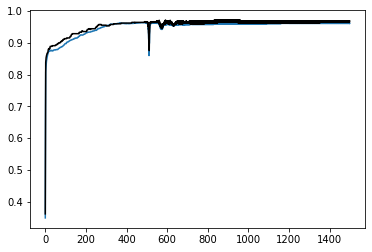

In [114]:
model = NeuralNetwork(input_size,[3,5],2)
train_acc,val_Acc= train(X_train,Y_train,model,1500,0.0001)
plt.plot(train_acc)
plt.plot(val_Acc,color="black")
plt.show()

In [115]:
dftest = pd.read_csv('Logistic_X_Test.csv')
xtest = dftest.values
print(xtest.shape)

(750, 2)


In [121]:
ytest = list(model.predict(xtest))
print(len(ytest))

750


In [122]:
df = pd.DataFrame(ytest)
df.to_csv('sol.csv',header=['label'],index=False)